# WIP
# Pytorch
Na předchozích workshopech (resp. ve vedlejších noteboocích, pokud toto čtete na Githubu) jsme se věnovali základním technikám a algoritmům strojového učení. Ty měli výhodu nepříliš velkých hardwarových nároků a vcelku solidnímu výkonu na tabulkoidních datech. Nezmínili jsme tehdy ale neuronové sítě a deep learning. V povídání o textu jsem se o tyto termíny už trochu otřeli, nicméně na danou problematiku se pořádně podíváme až nyní.  
Technicky vzato jsou neuronové sítě jen podmnožinou strojového učení. Fakticky se ale jedná o velice důležitou podmnožinu, která s přehledem dokázala vyřešit problémy, na které klasické postupy nestačily - zmiňme třeba klasifikaci objektů na obrázcích či složitější práci s textem. Daní za tento výkon je větší složitost problematiky a hlavně větší doba trénování a hardwarové nároky.  
V současné době jsou v pythonu etablovány dva frameworky spojené s neuronovými sítěmi - TensorFlow (i s nadstavbou Keras) a PyTorch. Existují sice mezi nimi určité technické rozdíly, nicméně ty pro naše dnešní úvodní povídání nejsou zase až tak podstatné a navíc s v průběhu času postupně stírají. Když se podíváte na můj GitHub, uvidíte pár věcí založených na TensorFlowu a koneckonců nultou iteraci tohoto workshopu jsem ukazoval též na něm. Proč tedy v nadpisu vidíte PyTorch? Inu, důvod je dosti přizemní - Tensorflow 2.X není kompatibilní s grafickou kartou na mém notebooku, tudíž by i příprava ukázkových příkladů trvala příliš dlouho. No a ukazovat Vám příklady pro starou verzi Tensorflowu mi nepřijde jako úplně dobrý nápad. 

## Obsah

## Manipulace s tenzory  
Stejně jako balíček Pandas přináší dataframe (a sérii), na kterém poté staví celou svou činnost, nese s sebou Pytorch tenzor. Co to vlastně tenzor je? Tento termín se vyskytuje i mimo Pytorch a označuje se jím (matematici pominou zjednodušení) zobecnění skalárů, vektrorů a matic do vyšších dimenzí. Člověk by si mohl myslet, že stejnou funkčnost zastanou stávající pythoní objekty a není třeba vymýšlet něco nového. Bohužel je ale situace komplikovanější. V Pythonu je totiž každá věc včetně integerů či floatů objekt. To znamená, že tyto konstrukce obsahují krom číslené informace i něco navíc. Tohle "něco" sice přináší dodatečnou funkčnost, ale také to zabírá víc paměti. U pár čísel to nevadí, jenomže při práci s neuronovými sítěmi s pouhými několika čísli pracovat nebudeme. No a výhodou tenzoru je to, že čísla v něm obsažená jsou opravdu jen čísla bez čehokoli dalšího. Jinak pytorchí tenzory mohou obsahovat pouze čísla (pokud booleany budeme brát také za čísla), nikoli ale textové řetězce.  
No a jelikož jsou tenzory základním stavebním kamenem Pytorche, měli bychom se s nimi naučit pracovat, než budeme dělat cokoli komplikovanějšího.  

Z historických důvodů se importovaný balíček nejmenuje pytorch, nýbrž torch.

In [1]:
import torch
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Asi nejpřímočařejší je vytvoření 1D tenzorů obsahující pouze jedničky či nuly. Parametr funkcí *ones* a *zeros* udává počet těchto čísel.

In [5]:
tensor_of_ones = torch.ones(5)
print("Tensor of ones:")
print(tensor_of_ones)

tensor_of_zeros = torch.zeros(7)
print ("Tensor of zeros:")
print(tensor_of_zeros)

Tensor of ones:
tensor([1., 1., 1., 1., 1.])
Tensor of zeros:
tensor([0., 0., 0., 0., 0., 0., 0.])


Lze vytvořit i tenzor obsahující náhodná čísla:

In [3]:
torch.rand(5)

tensor([0.2395, 0.2264, 0.5841, 0.7670, 0.4245])

K elementům tenzoru můžeme přistupovat "normálně", tj přes index. Za pozornost asi stojí zmínka, že i když chceme jen jeden element tenzoru, nevrátí se nám číslo, ale tenzor.

In [6]:
tensor_of_ones[0]

tensor(1.)

Pokud opravdu potřebujeme číslo, musíme použít metodu *item*.

In [7]:
tensor_of_ones[0].item()

1.0

Tenzory nejsou immutable, nýbrž se čísla v nich dají měnit:

In [4]:
tensor_of_ones[-1] = 999
tensor_of_ones

tensor([  1.,   1.,   1.,   1., 999.])

Pokud chceme mít tenzor jedniček/nul o více rozměrech, napíšeme zkrátka do funkce více parametrů.

In [5]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
torch.zeros(2,3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Obecný tenzor se dá vyrobit například pomocí listu

In [7]:
tensor_of_numbers = torch.tensor([1,2,3,4,5,6])
tensor_of_numbers

tensor([1, 2, 3, 4, 5, 6])

Takto lze vytvořit i vícedimenzionální tenzory - v listu musí být podlisty

In [8]:
tensor_more_dims = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 6]
])
tensor_more_dims

tensor([[1, 2],
        [3, 4],
        [5, 6]])

Upozorněme, že nelze vytvořit "pilovitý tenzor", tj. něco v duchu
```python
tensor_bad = torch.tensor([
    [1, 2],
    [3],
    [5, 6]
])
```
Tvar (velikost tenzoru v jednotlivých dimenzích) se získá pomocí atributu shape

In [9]:
print(f"Shape of 1D tensor: {tensor_of_numbers.shape}")
print(f"Shape of 2D tensor: {tensor_more_dims.shape}")

Shape of 1D tensor: torch.Size([6])
Shape of 2D tensor: torch.Size([3, 2])


Když hovoříme o dimenzích, asi bychom měli zmínit funkce squeeze a unsqueeze. Squeeze z tenzoru odstraní všechny dimenze o velikosti 1.

In [10]:
tensor_before_squeeze = torch.ones(2,1)
print("Tensor before squeze:")
print(tensor_before_squeeze)
print(f"Shape of tensor before squeeze: {tensor_before_squeeze.shape}\n")

tensor_after_squeeze = tensor_before_squeeze.squeeze()
print("Tensor after squeeze:")
print(tensor_after_squeeze)
print(f"Shape of tensor after squeeze: {tensor_after_squeeze.shape}\n")

Tensor before squeze:
tensor([[1.],
        [1.]])
Shape of tensor before squeeze: torch.Size([2, 1])

Tensor after squeeze:
tensor([1., 1.])
Shape of tensor after squeeze: torch.Size([2])



Unsqueeze naopak na místo určené uživatelem dimenzi o velikosti jedna přidá. Typické užití je v převedení jednoho tenzoru do stejného rozměru, jako má tenzor jiný, aby se s oběma součaasně dalo pracovat.

In [11]:
tensor_before_unsqueeze = torch.ones(2,2)
print("Tensor before unsqueze:")
print(tensor_before_unsqueeze)
print(f"Shape of tensor before unsqueeze: {tensor_before_unsqueeze.shape}\n")

tensor_after_unsqueeze = tensor_before_unsqueeze.unsqueeze(1)
print("Tensor after unsqueeze:")
print(tensor_after_unsqueeze)
print(f"Shape of tensor after unsqueeze: {tensor_after_unsqueeze.shape}\n")

Tensor before unsqueze:
tensor([[1., 1.],
        [1., 1.]])
Shape of tensor before unsqueeze: torch.Size([2, 2])

Tensor after unsqueeze:
tensor([[[1., 1.]],

        [[1., 1.]]])
Shape of tensor after unsqueeze: torch.Size([2, 1, 2])



Výše jsme si ukázali, jak se dostat k číslu v 1D tenzoru. U vícedimenzionálních tenzorů přistupujeme k jednotlivým číslům pomocí n indexů, kde n je počet dimenzí.

In [12]:
tensor_more_dims[1,0]

tensor(3)

Případně můžeme vzít celý řádek

In [13]:
row = tensor_more_dims[1]
row

tensor([3, 4])

Či sloupec

In [14]:
column = tensor_more_dims[:,1]
column

tensor([2, 4, 6])

Bacha ale, takhle se nevyrání nové tenzory, pouze se na původní data koukáme jiným způsobem.

In [15]:
column[0] = 20
tensor_more_dims

tensor([[ 1, 20],
        [ 3,  4],
        [ 5,  6]])

Fakticky to funguje tak, že jsou data v tzv storagi - vždy jednorozměrném poli. Tenzory jsou pak jenom pohledem na toto pole. Narozdíl od tenzoru nemá storage parametr shape.

In [16]:
tensor_more_dims.storage()

 1
 20
 3
 4
 5
 6
[torch.LongStorage of size 6]

Funkce storage_offset() vrací index, od kterého ve storagi začíná první prvek příslušného tenzoru.

In [17]:
tensor_more_dims.storage_offset()

0

In [18]:
column.storage_offset()

1

In [19]:
row.storage_offset()

2

Stride zase říká, kolik prvků se musí ve storagi přeskočit, když se v tenzoru přesuneme o jednu pozici. Výsledný tuple ukazuje stride pro každou dimenzi.

In [20]:
tensor_more_dims.stride()

(2, 1)

In [21]:
column.stride()

(2,)

In [22]:
row.stride()

(1,)

Proč vůbec o těchto věcech mluvíme? Díky nim jsou mnohé operace s tenzory výpočetně nenáročné - nedochází totiž k přeuspořádání dat, pouze se změní několik málo metadat. Příkladem takovéto operace může být transpozice, tj. prohození sloupců a řádků. Realizujeme ji pomocí metody *t*.

In [23]:
original_tensor = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 6],
])
print("Original tensor")
print(original_tensor)
print(f"Original tensor metadata -  offset: {original_tensor.storage_offset()}, stride: {original_tensor.stride()}\n")
print("Transponed tensor")
transponed_tensor = original_tensor.t()
print(transponed_tensor)
print(f"Transponed tensor metadata -  offset: {transponed_tensor.storage_offset()}, stride: {transponed_tensor.stride()}\n")

Original tensor
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Original tensor metadata -  offset: 0, stride: (2, 1)

Transponed tensor
tensor([[1, 3, 5],
        [2, 4, 6]])
Transponed tensor metadata -  offset: 0, stride: (1, 2)



Transpozici lze realizovat i na tenzorech o vyšších dimenzích. Tehdy se musí použít funkce *transpose*, která přebírá dva parametry - indexy prohazovaných os. Tj. pro 2D tenzory je metodě *t* ekvivaletní *transpose(0,1)*.

In [24]:
many_dim_tensor = torch.zeros(2,3,4)
print(many_dim_tensor.shape)
transponed_many_dim_tensor = many_dim_tensor.transpose(1,2)
print(transponed_many_dim_tensor.shape)

torch.Size([2, 3, 4])
torch.Size([2, 4, 3])


Existuje ale ještě jedna, asi dokonce častěji používaná funkcionalita - pohledy. O co se jedná? Dalo by se říci, že pohled se má k tenzoru jako tenzor ke storagi. Jinými slovy jedná se o způsob, jak přespořádat elementy tenzoru. Z hlediska technického je view metoda tenzoru, která přebírá n argumentů. Ty popořadě specifikují velikost dimenze, jejíž index odpovídá pořadí argumentu. Pokud člověk na nějaké místo (nejen na konec, jako v příkladu, ale i kamkoli jinam) napíše mínus jedničku, dopočítá se velikost dimenze z ostatních dimenzí a počtu dat v původním tenzoru.

In [25]:
normal_tensor = torch.tensor([
    [1,2,3,4,5,6],
    [7,8,9,10,11,12]
])

first_view = normal_tensor.view(3,4)
second_view = normal_tensor.view(2,3,-1)

print("Original tensor:")
print(normal_tensor)
print("First tensor:")
print(first_view)
print("Second tensor:")
print(second_view)

Original tensor:
tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])
First tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
Second tensor:
tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])


Tenzor je objekt obsahující čísla, vyvstává tak otázka, jak s tenzory (ve správných dimenzích maticemi či vektory) vlastně počítat.

In [19]:
first_tensor = torch.Tensor([
    [1,1,1],
    [2,2,2],
    [3,3,3]
])
second_tensor = torch.Tensor([
    [10,1,0],
    [0,10,1],
    [-1,-1,-1]
])

Přičítání/odečítání/násobení/dělení tenzoru číslem je přímočaré:

In [13]:
first_tensor/3

tensor([[0.3333, 0.3333, 0.3333],
        [0.6667, 0.6667, 0.6667],
        [1.0000, 1.0000, 1.0000]])

Sčítání a odčítání tenzorů mezi sebou také (jen tedy tenzory musí mít stejný tvar).

In [20]:
first_tensor-second_tensor

tensor([[-9.,  0.,  1.],
        [ 2., -8.,  1.],
        [ 4.,  4.,  4.]])

Násobení tenzorů po elementech (myšleno, že dejme tomu ve  2D bude ij-tý element výsledku roven ij-tému elementu prvního tenzoru a ij-tému elementu druhého tenzoru) realizujeme hvězdičkou...

In [8]:
first_tensor*second_tensor

tensor([[10.,  1.,  0.],
        [ 0., 20.,  2.],
        [-3., -3., -3.]])

... či metodou *mul*.

In [9]:
first_tensor.mul(second_tensor)

tensor([[10.,  1.,  0.],
        [ 0., 20.,  2.],
        [-3., -3., -3.]])

Klasické maticové násobení provedeme zavináčem...

In [10]:
first_tensor@second_tensor

tensor([[ 9., 10.,  0.],
        [18., 20.,  0.],
        [27., 30.,  0.]])

... či metodou *matmul*.

In [11]:
first_tensor.matmul(second_tensor)

tensor([[ 9., 10.,  0.],
        [18., 20.,  0.],
        [27., 30.,  0.]])

Někdy potřebujeme udělat kopii tenzoru, která nebude s originálem sdílet data ve storagi. Tehdy musíme použít metodu *clone*.

In [26]:
cloned_tensor = original_tensor.clone()
cloned_tensor[0,0] = 50
print("Original tensor")
print(original_tensor)
print("Cloned tensor")
print(cloned_tensor)

Original tensor
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Cloned tensor
tensor([[50,  2],
        [ 3,  4],
        [ 5,  6]])


Pro porovnání elementů v tenzoru s určitou hodnotou můžeme použít následující funkce:
- lt (neboli lower than)
- le (neboli lower than or equal)
- eq (neboli equal)
- ge (neboli greater than or equal)
- gt (neboli greather than) 

Jejich samostatné použití vyústí v tenzor booleanů:

In [27]:
comparison_tensor = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
print("Original tensor")
print(comparison_tensor)
print("Tensor of comparison validity:")
print(comparison_tensor.eq(5))

Original tensor
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
Tensor of comparison validity:
tensor([[False, False, False],
        [False,  True, False],
        [False, False, False],
        [False, False, False]])


Pro zjištění hodnot podmínku splňující musíme podobně jako v pandách použít hranaté závorky.

In [28]:
comparison_tensor[comparison_tensor.ge(5)]

tensor([ 5,  6,  7,  8,  9, 10, 11, 12])

Pokud chceme v jeden okamžik použít více podmínek, musíme je svázat pomocí & (má význam *and*) či | (má význam *or*)

In [29]:
comparison_tensor[comparison_tensor.lt(3) | comparison_tensor.gt(10)]

tensor([ 1,  2, 11, 12])

In [30]:
comparison_tensor[comparison_tensor.gt(3) & comparison_tensor.lt(10)]

tensor([4, 5, 6, 7, 8, 9])

Další pro obálkoidní objekty (listy, dataframy) typickou úlohou je nalepování jeden na druhý. To se v Pytorchi realizuje funkcí cat. Jejím prvním parametrem je tuple či list s na sebe nalepovanými tenzory, druhý parametr - dim - pak říká, přes jakou osu/dimezi se na sebe tenzory vlastě mají lepit. Platí přitom, že ostatní dimeze tenzorů by měly mít stejný rozměr.

In [31]:
first_tensor = torch.tensor([
    [1,2,3,4],
    [5,6,7,8]
])
second_tensor = torch.tensor([
    [9,10,11,12]
])
concatenated_tensor = torch.cat((first_tensor, second_tensor), dim=0)
concatenated_tensor

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Jakých datových typů vlastně mohou hodnoty v tenzoru nabývat? Máme k dispozici několikero typů floatů a integerů + booleany:
- torch.bool  
- torch.float16 (alias torch.half)
- torch.float32 (alias torch.float) - jedná se o default
- torch.float64 (alias torch.double)
- torch.int8
- torch.uint8
- torch.int16 (alias torch.short)
- torch.int32 (alias torch.int)
- torch.int64 (alias torch.long)  - jedná se default při vložení celých čísel do kontruktoru
  
Datový typ můžeme nastavit při vytvoření tenzoru s pomocí parametru dtype:

In [32]:
tensor_integers = torch.tensor([1,2,3,4], dtype=torch.int32)
tensor_integers

tensor([1, 2, 3, 4], dtype=torch.int32)

In [33]:
tensor_floats = torch.tensor([1,2,3,4], dtype=torch.float32)
tensor_floats

tensor([1., 2., 3., 4.])

Pro konverzi již existujících tensorů lze použít metody *to* či *type*. Pro jistotu zdůrazněme, že původní tenzor si zachovává svůj datový typ.

In [34]:
tensor_float64 = tensor_integers.to(dtype=torch.double)
tensor_float64

tensor([1., 2., 3., 4.], dtype=torch.float64)

In [35]:
tensor_int16 = tensor_floats.type(torch.short)
tensor_int16

tensor([1, 2, 3, 4], dtype=torch.int16)

S pytorchími tenzory a numpoidními poli se pracuje dosti podobně a tak není moc překvapivé, že jedny můžeme konvertovat na druhé. Přeměna tezoru na numpy array se provede pomocí metody *numpy*.

In [36]:
some_tensor = torch.tensor([1,2,3,4])
some_numpy_array = some_tensor.numpy()
some_numpy_array

array([1, 2, 3, 4], dtype=int64)

Opačný proces se realizuje funkcí *from_numpy*.

In [37]:
tensor_from_numpy = torch.from_numpy(some_numpy_array)
print(tensor_from_numpy)
print(tensor_from_numpy.dtype)

tensor([1, 2, 3, 4])
torch.int64


V kontextu deep learningu je významný přesun tenzorů z CPU na GPU. Proč vlastně GPU vůbec řešíme? Jeden výpočetní element (jádro) na CPU je silnější než jeden výpočetní element na GPU. Jenomže zatímco jader na CPU máme pár jednotek, na GPU je jich řádově mnohem více. No a vzhledem k tomu, že výpočty spojené s neuronovými sitěmi se dají dobře paralelizovat, trvají operace s použitím GPU mnohem kratší dobu.  
Každopádně abychom něco s GPU mohli dělat, musíme si ověřit, že ji Pytorch vůbec vidí:

In [2]:
torch.cuda.is_available()

True

Aby nějaký výpočet na GPU mohl probíhat, musíme tam nejprve dostat vstupní data. Jedním ze způsobů, jak toho docílit, je stanovit už v konstruktoru tenzoru, že mají operace probíhat na *device="cuda"*. CUDA (Compute Unified Device Architecture) je platforma pro paralelní výpočty nad grafickými kartami Nvidie. Pozn.: nula v outputu buňky níže označuje index grafické karty.

In [38]:
tensor_gpu = torch.tensor([1,2,3,4], device="cuda")
tensor_gpu

tensor([1, 2, 3, 4], device='cuda:0')

Už vytvořené tenzory zkopírujeme na GPU pomocí metody *to*. Stejná metoda pak zase zkopíruje tenzor z GPU na CPU.

In [39]:
tensor_cpu = torch.tensor([1,2,3,4])
tensor_moved_to_gpu = tensor_cpu.to(device="cuda")
tesor_moved_to_cpu = tensor_moved_to_gpu.to(device="cpu")

print(tensor_cpu)
print(tensor_moved_to_gpu)
print(tesor_moved_to_cpu)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4], device='cuda:0')
tensor([1, 2, 3, 4])


Zdůrazněme, že se tu opravdu jedná o kopírování, tj. změna v původním objektu nevyvolá změnu v objektu na novém působišti.

In [40]:
tensor_cpu[0] = 10
tensor_moved_to_gpu[1] = 20
tesor_moved_to_cpu[2] = 30

print(tensor_cpu)
print(tensor_moved_to_gpu)
print(tesor_moved_to_cpu)

tensor([10,  2,  3,  4])
tensor([ 1, 20,  3,  4], device='cuda:0')
tensor([ 1,  2, 30,  4])


Co dělat, když chceme tenzor uložit na disk? Nejpřímočařejší je využití funkce *save*, která fakticky objekt uloží ve formátu pickle.

In [41]:
saved_tensor = torch.tensor([1,2,3,4])
torch.save(saved_tensor, "saved_tensor.t")

Nahrát tenzor z disku můžeme pomocí funkce load.

In [42]:
loaded_tensor = torch.load("saved_tensor.t")
loaded_tensor

tensor([1, 2, 3, 4])

Možností pro ukládání je více - například lze použít formát HDF5. To zde ale ukazovat nebudeme.

## Příprava dat - tabulky

### Použití Pytorche
Předtím, než se pustíme do vytvoření té nejjednodušší neuronové sítě, si musíme připravit data. V rámci zažití pytorchích operací to zkusme napřed bez použití sklearnovkých utilit. Nicméně jak později uvidíme, s nimi se bude přeci jen pracovat efektivněji.  
Co se dat týče, použijme klasický dataset kosatců.

In [2]:
iris_data_heap = load_iris()
iris_dataframe = pd.DataFrame(iris_data_heap["data"], columns=iris_data_heap["feature_names"])
iris_dataframe["target"] = pd.Series(iris_data_heap["target"])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pytorch dovoluje konvertovat na tenzory numpoidní pole, nikoli dataframy, proto dodatečný převod.

In [31]:
iris_tensor = torch.tensor(iris_dataframe.to_numpy())
print(f"Shape of iris tensor: {iris_tensor.shape}")
iris_tensor[0:5,:]

Shape of iris tensor: torch.Size([150, 5])


tensor([[5.1000, 3.5000, 1.4000, 0.2000, 0.0000],
        [4.9000, 3.0000, 1.4000, 0.2000, 0.0000],
        [4.7000, 3.2000, 1.3000, 0.2000, 0.0000],
        [4.6000, 3.1000, 1.5000, 0.2000, 0.0000],
        [5.0000, 3.6000, 1.4000, 0.2000, 0.0000]], dtype=torch.float64)

Data rozděleme na trénovací a testovací. V Pytorchi na to lze použít funkci random_split, s tím se ale pojí použití několika dalších typů objektů. Na ty přijde řeč až později v textu, proto tady provedeme naivnější postup s pomocí funkce *randperm*. Ta jako parametr přebírá celé číslo n a vytvoří jednorozměrný tenzor s náhodně uspořádánými čísly 0 až n-1 (každé se vyskytuje právě jednou). Tato náhodně přeuspořádaná čísla nám poslouží jako indexy řádků nového tenzoru. Ten bude fakticky stejný jako původní, jen bude mít přeházené řádky. Tento nový tenzor rozdělíme v poměru 80%:20% s tím, že větší část bude sloužit k trénování modelu a menší k jeho testování.

In [32]:
total_length = iris_tensor.shape[0]
train_length = round(total_length*0.8)
iris_tensor_row_permutation = iris_tensor[torch.randperm(total_length),:]
iris_train = iris_tensor_row_permutation[:train_length,:]
iris_test = iris_tensor_row_permutation[train_length:,:]

Prediktory musí stát samostatně - vyrobme si tedy nové tenzory, kde sloupeček s targety není.

In [33]:
iris_train_predictors = iris_train[:,:-1]
iris_test_predictors = iris_test[:,:-1]

print(f"Shape of iris tensor without target: {iris_train_predictors.shape}")
iris_train_predictors[0:5,:]

Shape of iris tensor without target: torch.Size([120, 4])


tensor([[5.0000, 3.4000, 1.6000, 0.4000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [6.9000, 3.1000, 4.9000, 1.5000]], dtype=torch.float64)

Stejně tak si vyrobme i tenzor, kde budou pouze targety. Jelikož Pytorch si s takovýmto formátem targetu poradí (nemusíme provádět one-hot encodování), nemusíme nic dalšího dělat. 

In [34]:
iris_train_target = iris_train[:,-1]
iris_test_target = iris_test[:,-1]

print(f"Shape of iris target tensor: {iris_train_target.shape}")
iris_train_target

Shape of iris target tensor: torch.Size([120])


tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 1., 1., 0.,
        2., 1., 0., 0., 0., 1., 0., 2., 1., 1., 2., 2., 2., 0., 1., 1., 1., 1.,
        2., 0., 2., 2., 0., 1., 1., 2., 2., 0., 2., 1., 0., 1., 0., 0., 0., 1.,
        2., 0., 0., 1., 1., 1., 0., 2., 2., 0., 1., 1., 1., 0., 2., 0., 1., 1.,
        2., 2., 2., 2., 2., 1., 1., 2., 0., 0., 1., 0., 1., 1., 0., 2., 1., 1.,
        1., 0., 2., 2., 1., 0., 1., 2., 0., 0., 2., 2., 0., 2., 2., 2., 0., 1.,
        0., 2., 2., 2., 1., 1., 1., 0., 2., 2., 0., 1.], dtype=torch.float64)

Z důvodu, který si objasníme za chvíli, jsou neuronové sítě jedním z algoritmů, který vyžaduje nanormovaná data. Opět zkusíme provést normování bez použití utilit z sklearnu.

In [35]:
columns_mean = torch.mean(iris_train_predictors, dim=0)
print(f"Tensor with average value of every column: {columns_mean}")
columns_variance = torch.var(iris_train_predictors, dim=0)
print(f"Tensor with variance of every column: {columns_variance}")

iris_train_predictors_normalised = (iris_train_predictors-columns_mean)/torch.sqrt(columns_variance)
iris_test_predictors_normalised = (iris_test_predictors-columns_mean)/torch.sqrt(columns_variance)

iris_train_predictors_normalised[0:5,:]

Tensor with average value of every column: tensor([5.8050, 3.0517, 3.7025, 1.1708], dtype=torch.float64)
Tensor with variance of every column: tensor([0.6973, 0.1813, 3.2172, 0.6006], dtype=torch.float64)


tensor([[-0.9640,  0.8180, -1.1722, -0.9947],
        [-1.2035,  0.8180, -1.0049, -1.2527],
        [-0.4850, -0.1213,  0.4446,  0.4248],
        [-1.5628, -1.7651, -1.3394, -1.1237],
        [ 1.3113,  0.1135,  0.6676,  0.4248]], dtype=torch.float64)

### Použití scikit-learnu

Nyní se pokusíme dosáhnout stejného vysledku s použitím scikit-learnu. Pro zpracování targetu použijeme OneHotEncoder. Jelikož chceme mít na výstupu numpy array a nikoli matici, musíme do konstruktoru vložit sparse=False. No ale jelikož budeme dále používat objekty vyrobené právě s pomocí sklearnu, proběhne tu i rozdělení na trénovací a testovací data.

In [3]:
train_features, test_features, train_target, test_target = \
    train_test_split(iris_dataframe.drop("target", axis=1), iris_dataframe[["target"]], test_size=0.2, random_state=10)

In [4]:
target_train_tensor = torch.tensor(train_target.to_numpy(), dtype=torch.int64).squeeze()
target_test_tensor = torch.tensor(test_target.to_numpy(), dtype=torch.int64).squeeze()

target_train_tensor

tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1,
        1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1,
        2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2,
        1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0,
        1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

Ani ke škálování se toho mnoho říci nedá:

In [5]:
scaler_standard = StandardScaler()

scaled_predictors_train = scaler_standard.fit_transform(train_features)
scaled_predictors_train_tensor = torch.tensor(scaled_predictors_train)

scaled_predictors_test = scaler_standard.transform(test_features)
scaled_predictors_test_tensor = torch.tensor(scaled_predictors_test)

scaled_predictors_train_tensor[0:5,:]

tensor([[ 0.8711, -0.3989,  0.4606,  0.1058],
        [ 0.3938, -0.3989,  0.2919,  0.1058],
        [ 1.5871, -0.1677,  1.1354,  0.4945],
        [-0.0835, -0.6302,  0.7418,  1.5309],
        [ 0.5131, -1.3239,  0.6855,  0.8831]], dtype=torch.float64)

## Výroba jednoduché neuronové sítě

Na úplném začátku si ujasněme, co vlastně jednoduchou (dense) sítí myslíme. Jedná se o strukturu složenou z neuronů, které jsou uspořádány do vrstev (viz obr. 1). Každý neuron v n-té vrstvě je spojen s každým neuronem v n-1 a n+1 vrstvě, s neurony ze své vůastní vrstvy ale žádné spojení nemá. První vrstva se nazývá vrstvou vstupní. Do každého neuronu zde umístěného se bez jakýchkoli dalších transformací dostávají data z jednoho z prediktorů. To tedy například znamená, že neuronová síť zpracovávající kosatcová data by měla mít 4 vstupní neurony. Podobně výstuní vrstva obsahuje to, co by měl model uživateli poskytnout. V případě regresních úloh či binárního klasifikátoru je na výstupu jeden neuron, multiclass klasifikačních úloh by ale na výstupu měl být pro každou třídu alokován jeden neuron. Tyto neuronvy by totiž měly obsahovat pravděpodobnost, že ohodnocovaný záznam do příslušné třídy patří.   
![vrstvy](pytorch_images/layers.png)
<center>Obrázek 1: Uspořádání neuronů do vrstev.</center>  

V předchozím odstavci se pořád mluví o neuronech - jak ale tyto záhadné objekty fungují? Neuron přebírá informace - hodnoty z předešlé vrstvy. Nicméně tyto hodnoty jsou přenásobeny váhami $w_i$. Zdůrazněme, že jelikož váhy NJESOU omezeny na interval [0,1], může se jejich působením přebíraná hodnota i zvětšovat. V obrázku č. 2 vidíme, že do neuronu míří i jakési *b*. Jedná se o bias neboli konstantu, která je pro každný neuron jiná. Když se to dá dohromady, má hodnota např. neuronu C z obrázku velikost $z = w_1A + w_2B + b_C$. Kdyby toto bylo vše, neměla by všam neuronová síť moc smysl. Jednalo by se totiž o řetěz lineárních operací, které by se daly přepsat do podoby jedné jediné lienární operace. Proto se na mezivýsledek *z* v rámci neuronu vypustí nějaká nelineární funkce (obvykle nazývaná aktivační funkcí) a výstupem neuronu je tak  
$y = f_{akt}(z) = f_{akt}(w_1A + w_2B + b_C)$.  

## Aktivační funkce
Aktivační funkce bývají pro jednu vrstvu stejné. Častokrát dokonce bývá aktivační funkce stejná pro celou síť - tedy s čestnou výjimkou výstupní vrstvy. Tam bývá buďto funkce, která hodnoty neuronu převádí do intervalu [0,1] (klasifikační úlohy), anebo aktivační funkce absentuje (regresní úlohy). A jaké funkce se vlastně používají?

#### Sigmoid
Funkce sigmoid definovaná jako  
$f(x) = \frac{1}{1+exp(-x)}$  
bere jako vstup čísla v intervalu [-inf, +inf], aby vyprodukovala výstup z intervalu [0,1]. Díky tomu může být použita jako aktivační funkce pro výstupní vrstvu u binárního klasifikačního problému, kde se její produkt dá interpretovat jako pravděpodobnost. Kdysi se sigmoid používal jako aktivační funkce i u skrytých vrstev, nicméně ukázalo se, že se pro takovou úlohu moc nehodí. Z grafu níže vidíme, že se pro (relativně) velké a malé hodnoty saturuje. Jeho derivace je díky tomu v těchto oblastech velice malá. Níže si u backpropagace ukážeme, že při hledání optimálních hondot vah se mezi sebou přenásobují všelijaké derivace. No a sigmoid takovéto součiny posílal do nuly - tehdy se hovořilo o *vanishing gradientu*.

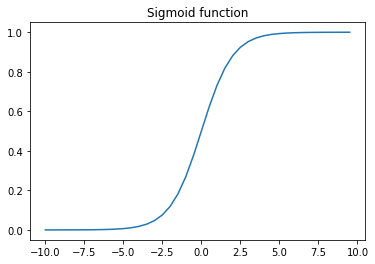

In [15]:
x = np.arange(-10,10,0.5)
y = 1/(1+np.exp(-x))
plt.plot(x,y);
plt.title("Sigmoid function");

#### Softmax  
Softmax se používá jako aktivační funkce na výstupní vrstvě pro případ multiclass klasiifikační úlohy. Stejně jako softmax provádí převod intervalu [-inf, +inf] na [0,1], navíc ale provádí normování. To znamená, že pravděpodobnosti všech tříd se po použití softmaxu dají sečíst na jedničku. Matematický předpis nabývá tvaru  
$f(x_i)=\frac{exp(x_i)}{\sum_{j=1}^{k}exp(x_j)}$


#### Tanh  
Hyperbolický tangent se chová podobně jako sigmoid. Nicméně jeho použití vede k rychlejšímu natrénování sítě (viz Y. Lecun et al.: [Efficient BackProp](https://www.researchgate.net/publication/2811922_Efficient_BackProp), sekce 4.3 a 4.4). Tanh bohužel se sigmoidem sdílí i problém s vanishing gradientem. No a jelikož interval [-inf,+inf] převádí na [-1,1], není tudíž vhodný na použití pro výstupní vrstvu.  
$f(x) = \frac{exp(x) - exp(-x)}{exp(x) + exp(-x)}$ 

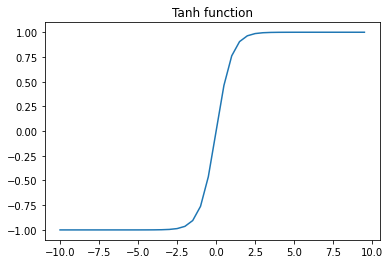

In [2]:
x = np.arange(-10,10,0.5)
y = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x,y);
plt.title("Tanh function");

#### ReLU
ReLU (rectified linear unit) je definována jako  

$f(x) = max(0,x)$

Dnes je asi nejpoužívanější aktivační funkcí. Důvodem tkví ve snížení pravděpodobnosti, že dojde ke gradient vanishing. To je dáno tím, že pro kladné x je gradient konstantní. Drobný bonus jsou i v porovnání se sigmoidem/tanh nižší výpočetní nároky. Trochu problémů může přinést způsob, jakým se do ReLU dostává nelinearita - nulovou hodnotou pro x<0. Pokud by se do této oblasti při trénování dostal větší počet neuronů, byla by jejích výstupem nula trénování by se zastavilo (tzv. dying ReLU problem). Proto se občas používá Leaky ReLU definované vztahem (konstanta pro x<0 je víceméně irrelevantní, pakliže je tedy malá)  

$f(x) = x $  pro $x > 0$  
$f(x) = 0,01x $ pro $x\le0$  

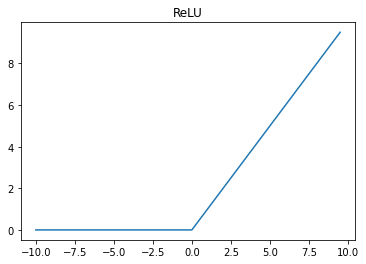

In [17]:
x = np.arange(-10,10,0.5)
y = np.where(x < 0, 0, x)
plt.plot(x,y)
plt.title("ReLU");

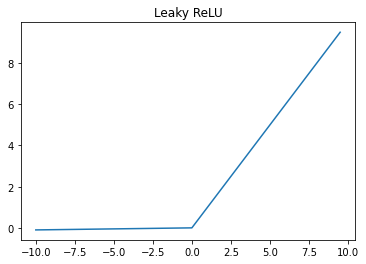

In [16]:
x = np.arange(-10,10,0.5)
y = np.where(x < 0, 0.01*x, x)
plt.plot(x,y)
plt.title("Leaky ReLU");

## Ztrátová funkce  
Nyní můžeme vzít prediktory pro jeden záznam, umístit je do vstupní vrstvy a postupným počítáním se dobrat až k výstupu poslední vrstvy. Tomu se říká *forward pass*. Nyní bychom rádi věděli, jak moc se takto vypočítaná čísla liší od realných hodnot. K tomu nám poslouží ztrátová funkce (*loss function*) *L*. Obecně platí, že čím je výstup této funkce vyšší, tím horší předpověď neuronové sítě je. Ztrátových funkcí existuje podobně jako aktivačních funkcí mnoho druhů s tím, že na různé úlohy se nejlépe hodí různé z nich.  

#### Mean squared error  (MSE)
Průměrná hodnota čtverce rozdílu reálné hodnoty $y$ a výstupu sítě $\hat{y}$ se používá pro regresní úlohy. Nepřekvapí, že akcentuje velikost rozdílu mezi odečítanými hodnotami. Její definice:  

$L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$  

Existují i funce příbuzné, například mean absolute error (MAE)  

$L_{MAE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|$  

anebo root mean squared error (RMSE)  

$L_{RMSE}(y, \hat{y}) = \frac{1}{n}\sqrt{\sum_{i=1}^{n}(y-\hat{y})^2}$  


#### Cross-entropy loss
Cross-entropy loss je určená pro klasifikační úlohy o X třídách. Je je definovaná jako  

$L_{categorical}(y, \hat{y}) = -\sum_{i}y_iln(\hat{y_i})$ 

Zdůrazněme, že $y_i$ i $\hat{y_i}$ mají význam pravděpodobnosti. Vidíme, že v optimálním případě bude hodnota ztrátové funkce nulová (pravděpodobnosti stoprocentní), v neideálním (faktické a predikované pravděpodobnosti různé od jedničky a  vzájemně odlišné) kladná. Koneckonců kvůli konzistenci s jinými ztrátovými funkcemi se zde vyskytuje znaménko mínus. Logaritmus hodnoty x pro x menší než základ logaritmu, který je v PyTorchi obvykle Eulerovo číslo, je totiž záporný.  
Variací na toto je binary cross-entropy pro úlohy o dvou možných třídách  

$L_{binary}(y, \hat{y}) = -yln(\hat{y})-(1-y)ln(1-\hat{y})$  

Vidíme, že $L_{categorical}$ se redukuje na $L_{binary}$, pokud *i* může nabývat pouze dvou hodnot a platí, že $y_1 + y_2 = 1$.   
Teď ale pár slov o tom, jak je cross-entropy loss implementovaná v Pytorchi. Jednak existuje ve fromě torch.nn.NLLLoss. V takovém případě čeká, že bude ve výstupní vrstvě použit jako aktivační funkce logaritmus softmaxu (nebo spíše funkce LogSoftmax, která ošetřuje problém s logaritmu na exponenciálu a s tím spjaté problémy). Dále zde máme torch.nn.CrossEntropyLoss. Ta v sobě LogSoftmax a NLLLoss spojuje. To mimo jiné znamená, že se ve výstupní vrstvě nesmí použít žádná aktivační funkce. V podobném vztahu jsou i binární cross-entropy ztrátové funkce BCELoss a BCEWithLogitsLoss (= sigmoid na výstupu + BCELoss).

## Backpropagace
Provedli jsme forward pass a spočítali hodnotu ztrátové funkce. Nyní bychom rádi tuto ztrátovou funkci minimalizovali, aby síť dokázala provádět správné predikce. Onu minimalizaci provedeme vhodnou změnou vah $w_i$. Nicméně jak tuto změnu realizovat? Přeci jen náhodné tipování by asi k cíli nevedlo.  
Musíme použít některý z optimizérů. Z nichž asi nejklasičtějším je tzv. *gradient descent*. Jeho definice vypadá následovně:  
$w_{i}^{new} = w_{i}^{old} - \alpha\frac{\partial L}{\partial w_{i}^{old}}$  
Co se tady vlastně děje? Nová hodnota váhy se počítá jako stará hodnota váhy opravená o člen beroucí v úvahu to, jak se s touto vahou mění hodnota ztrátové funkce. Proč zde máme znaménko mínus? Snažíme se nalézt minimum L v závislosti na w. Dejme tomu, že předpis pro ztrátovou funkci má podobu $L = w^2$ a my se nacházíme v bodě w = 5. Chceme se dostat do minima, tj. do bodu w = 0. Derivace L podle w činí 2w, tj. po dosazení 10. Pokud bychom desítku k původní hodnotě váhy přičetli, od kýženého cíle bychom se vzdálili. Dobrá, to vysvětluje mínus. Co je ale ono alfa? Jedná se o tzv. learning rate. Pro pochopení jeho významu se vraťme k našemu příkladu. Nyní desítku nebudeme k pětce přičítat, nýbrž odečítat. Výsledkem je -5. Tj. vyrazili jsme sice správným směrem, ale náš cíl - nulu - jsme značně přestřelili. Pro jiné ztrátové funkce by se mohlo dokonce stát, že namísto setrvání na konstatní vzdálenosti bychom se krok po kroku od cíle vzdalovali. Proto musí být derivace zmenšována learning ratem. Samozřejmě se to nesmí přehnat - pokud by byl learning rate přilíš malý, tak bychom k cíli nikdy nedokonvergovali.  
No jo, to je všechno sice hezké, ale jak vůbec onu derivaci ztrátové funkce vlastně spočítat? Přeci jen v sekci věnované ztrátovým funkcím se ve vzorcích žádná váha nevyskytovala. Na řešení tohoto problému použijeme proces zvaný backpropagace. Demonstrujeme si ho na příkladu sítě z obrázku č. 1. Předpokládejme, že všechny neurony včetně výstupního maji jako aktivační funkci softmax a že ztrátovou funkcí je MSE (ano, takhle asi normální síť vypadat nebude, ale jako ukázkový příklad je to vyhovující). Pro jednoduchost ignorujme existenci biasů a provádějme backpropagaci poté, co sítí probublal jeden trénovací záznam.  
Připomeňme si použité matematické výrazy. Nejprve ztrátová funkce (y je target trénovacího záznamu, jenž se nemění, $\hat{y_E}$ představuje výstup sítě, který chceme optimalizovat):  

$L = (y-\hat{y_E})^2$  

Výstup neuronu, dejme tomu neuronu E:  

$\hat{y_E} = sigmoid(z_E) = \frac{1}{1+exp(-z_E)}$  

No a hodnota v neuronu před použítím aktivační funkce:  

$z_E = w_5y_C + w_6y_D$  

Proveďme pomocný výpočet, který se nám posléze bude mnohokrát opakovat:  

$\frac{dy_X}{dz_X} = \frac{d}{dz_X}\frac{1}{1+exp(-z_X)} = \frac{-\frac{d}{dz}(1+exp(-z_X))}{(1+exp(-z_X))^2} = \frac{exp(-z)}{(1+exp(-z))^2} = \frac{1}{1+exp(-z_X)} \frac{exp(-z_X) + 1 - 1}{1+exp(-z_X)} = \frac{1}{1+exp(-z_X)}(1-\frac{1}{1+exp(-z_X)}) = y_X(1-y_X)$

Jak by tedy vypadá derivace ztrátové funkce podle jednotlivých vah, která se posléze dosadí do vztahu uvedeného na začátku této sekce? Podívejme se nejprve na derivaci podle $w_5$:  

$\frac{\partial L}{\partial w_5}=\frac{\partial L}{\partial y_E}\frac{\partial y_E}{\partial z_E}\frac{\partial z_E}{\partial w_5} = [-2(y-y_E)][y_E(1-y_E)][y_C]$

V tomto výrazu už všechny proměnné známe (y bez indexu je target z trénovacích dat, y s indexy C a E jsou výstupy neuronů C a E po aplikaci aktivačních funkcí). Derivace podle $w_6$ by byla téměř stejná, pouze by došlo k nahrazení $y_C$ za $y_D$. Obdobně pro váhy s indexy 1 až 4 by se počítalo  

$\frac{\partial L}{\partial w_3}=\frac{\partial L}{\partial y_C}\frac{\partial y_C}{\partial z_C}\frac{\partial z_C}{\partial w_3}= [\frac{\partial L}{\partial z_E}\frac{\partial z_E}{\partial y_C}][\frac{\partial y_C}{\partial z_C}][\frac{\partial z_C}{\partial w_3}] = [w_5\frac{\partial L}{\partial z_E}][y_C(1-y_C)][y_B] = [w_5\frac{\partial L}{\partial y_E}\frac{\partial y_E}{\partial z_E}][y_C(1-y_C)][y_B] = [w_5(-2(y-y_E))y_E(1-y_E)][y_C(1-y_C)][y_B]$  

#### Optimizéry  
V rámci výpočtu v sekci backpropagace jsme upravovali váhy sítě po každém jednotlivém záznamu. Předtím jsme u ztrátových funkcí zase počítali s tím, že se budou vyhodnocovat najednou všechna data. Jaký přístup tedy platí? Inu, platit mohou oba + tu je ještě jeden navíc:  
- batch gradient descent - u toho přístupu se ztrátová funkce vypočte jako průměr přes všechny záznamy. Poněkud nepříjemné je, že výpočet má tendenci zaseknout se v některém lokálním minimu ztrátové funkce a nedosáhne tak do nejoptimálnější globálního minima. No a pak tu je drobný technický problém - dost často nebude možné nacpat celý dataset do paměti.
- stochastic gradient descent - zde updaty vah probíhají po forward passu každého jednotlivého trénovacího záznamu. Tím je trénování mnohem rychlejší - po 100 záznamech dojde 100x k updatování vah a ne pouze k updatu jednomu, jako tomu bylo v předchozím případě. Díky tomu, že jsou jednotlivé záznamy zašuměné, dochází k vyskakování z lokálních minim (u batch gradient descent k tomu moc nedochází, neboť šum je přes množství záznamů vyprůměrován). Jen se občas vyskakuje i z minima globálního.
- mini-batch - jedná se o kombinaci předchozích - updaty vah probíhají po forward passu n záznamů. Takovýto update se nazývá iterace, kterých proběhne pro projití celého datasetu o N záznamech N/n. Tento průchod celým trénovacím datasetem se nazývá epocha.  

Toliko teorie. V Pytorchi je zrada v tom, že všechny tyto věci lze realizovat jedním optimizérem nazvaným SGD. Velikost batche se nastavuje jiným způsobem.  
Když už mluvíme o optimizérech neboli věcech, které se starají o updatování vah, obyčejný gradient descent ukázaný výše je jen tím nejstarším z mnoha dalších, často mnohem mocnějších.

TO DO: něco k hybnosti, ADAMovi apod.

### Dense síť v Pytorchi

Přejděme nyní od teorie k praxi. Nejprve si ukážeme výseky kódu umístěné v "nespustitelném" textu, spustitelný kód bude následovat až posléze.  
Nejprve si vytvoříme architekturu neuronové sítě. To se provede vytvořením nové třídy dědíci od *torch.nn.Module*. V konstruktoru si zadefinujeme jednotlivé prvky sítě coby atributy objektu. Ve funkci forward tyto prvky na sebe navážeme. Nakonec vytvoříme instanci sítě a přesuneme ji na vhodnou výpočetní lokaci.
```python
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(4,6)
        self.second_linear = torch.nn.Linear(6,3)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
```
Následně zvolíme ztrátovou funkci a optimizér. Do konstruktoru optimizéru vstupuje *model.parameters()*. Tato metoda vrací generátor s věcmi, které bude optimizér ladit - tenzory s váhami a biasy.
```python
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
```
Nyní je na čase specifikovat trénovací smyčku. Nejprve pošleme tenzor prediktorů i tenzor targetů do správné výpočetní lokace. Následně vypočteme predikci i ztrátu. Jelikož zde pracujeme v batchovém modu, tj. v rámci jedné iterace probereme celou epochu, je ztráta sumou ztrát přes všechny záznamy. Nyní musíme vynulovat uložené gradienty z předchozího učícího cyklu (*optimizer.zero_grad()*), na základě aktuální ztráty spočítat nové gradienty (*loss.backward()*) a s jejich pomocí aktualizovat váhy (*optimizer.step()*). Nakonec vezmeme ztrátu (z 1x1 tenzoru ji vyjmeme pomocí metody *item()*, vložíme ji do listu s ostatními trnénovacími ztrátami a vytiskneme ji (na 8 platných cifer).
```python
def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss,
    print_flag
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)
    if print_flag:
        print(f"Training loss: {loss:>8f} ")
```
Následně si zadefinujeme testovací smyčku. Opět se na začátku přenášejí tenzory prediktorů i targetů na příslušný device. Následně se spočítá predikce, ztráta a počet správně predikovaných záznamů. To vše v kontextovém manageru *with torch.no_grad*. Tato konstrukce slouží k tomu, aby se vypnul výpočet gradientu, díky čemu celá oprerace klade menší nároky na paměť (koneckonců i kdybychm tady nějaký gradient spočítali, v trénovací smyčce se vynuluje). Nakonec si spočítáme accuracy, kterou i se ztrátou vytiskneme.  
Pozn.: jelikož máme dataset, kde jsou všechny třídy stejnoměrně zastoupeny, není použití accuracy zas tak problematické. Samozřejmě pro ostré použití by to asi chtělo jinou metriku.
```python
def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss,
    print_flag
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct = (prediction.argmax(1) == target_test).type(torch.float).sum().item()

    accuracy = correct/len(target_test)
    testing_loss.append(test_loss)
    if print_flag:
        print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Loss: {test_loss:>8f} \n")
```
Nakonec musíme přidat smyčku, která bude v rámci každé epochy
```python
epochs = 1000
training_loss = []
testing_loss = []
for epoch_index in range(epochs):
    if (epoch_index+1)%100 == 0:
        print_flag = True
        print(f"Epoch {epoch_index+1}\n------------------------------------------------")
    else:
        print_flag = False

    training_function(
        scaled_predictors_train_tensor, target_train_tensor, 
        model, loss_function, optimizer, device, training_loss,
        print_flag
    )
    testing_function(
        scaled_predictors_test_tensor, target_test_tensor, 
        model, loss_function, device, testing_loss,
        print_flag
    )
print("Training has been completed.")
```
A neměli bychom zapomenout na vykreslení grafu, abychom viděli, jestli náhodou nedošlo k overfitu.
```python
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);
```

Epoch 100
------------------------------------------------
Training loss: 0.777569 
Test Error: 
 Accuracy: 56.7%, Loss: 0.848276

Epoch 200
------------------------------------------------
Training loss: 0.626815 
Test Error: 
 Accuracy: 56.7%, Loss: 0.711423

Epoch 300
------------------------------------------------
Training loss: 0.531465 
Test Error: 
 Accuracy: 63.3%, Loss: 0.620996

Epoch 400
------------------------------------------------
Training loss: 0.468242 
Test Error: 
 Accuracy: 70.0%, Loss: 0.554629

Epoch 500
------------------------------------------------
Training loss: 0.422054 
Test Error: 
 Accuracy: 76.7%, Loss: 0.500977

Epoch 600
------------------------------------------------
Training loss: 0.385415 
Test Error: 
 Accuracy: 83.3%, Loss: 0.455972

Epoch 700
------------------------------------------------
Training loss: 0.355129 
Test Error: 
 Accuracy: 83.3%, Loss: 0.417533

Epoch 800
------------------------------------------------
Training loss: 0.329372 

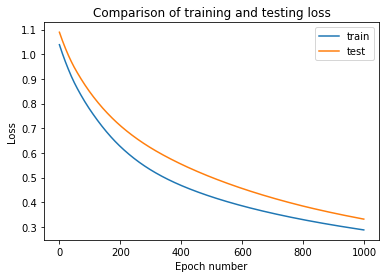

In [30]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(4,6)
        self.second_linear = torch.nn.Linear(6,3)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss,
    print_flag
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)
    if print_flag:
        print(f"Training loss: {loss:>8f} ")

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss,
    print_flag
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct = (prediction.argmax(1) == target_test).type(torch.float).sum().item()

    accuracy = correct/len(target_test)
    testing_loss.append(test_loss)
    if print_flag:
        print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Loss: {test_loss:>8f}\n")

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

epochs = 1000
training_loss = []
testing_loss = []
for epoch_index in range(epochs):
    if (epoch_index+1)%100 == 0:
        print_flag = True
        print(f"Epoch {epoch_index+1}\n------------------------------------------------")
    else:
        print_flag = False
    training_function(
        scaled_predictors_train_tensor, 
        target_train_tensor, model, 
        loss_function, optimizer, device, training_loss,
        print_flag
    )
    testing_function(
        scaled_predictors_test_tensor, 
        target_test_tensor, 
        model, loss_function, device, testing_loss,
        print_flag
    )
print("Training has been completed.")
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

Když budeme chtít separátně predikovat jeden záznam:

In [138]:
one_flower_data = [[5.1, 3.5, 1.4, 0.2]]
one_flower_data_scaled = scaler_standard.transform(one_flower_data)
model(torch.tensor(one_flower_data_scaled, dtype=torch.float))

tensor([[9.9962e-01, 3.5742e-04, 2.1419e-05]], grad_fn=<SoftmaxBackward>)

Vidíme tedy, že záznam patří do třídy nula.

Pokud chceme vidět hodnoty natrénovaných vah a biasů, musíme iterovat skrze *model.parameters()*. Popořadě vidíme tensor s váhami mezi vstupní a skrytou vrstvou (počet sloupců odpovídá počtu neuronů na vstupu, počet řádků počtu neuronů v skryté vrstvě), biasy neuronů skryté vrstvy, váhy pro přenos dat ze skryté vrstvy do vrstvy výstupní a nakonec biasy neuronů výstupní vrstvy.

In [151]:
for param in model.parameters():
    print(param.data)

tensor([[-0.6802,  0.9106, -1.2377, -0.8025],
        [ 0.3611,  0.2494, -1.0059, -1.2421],
        [-0.1037, -0.5822,  0.0942, -0.5350],
        [-0.3903,  0.2221,  0.0998,  0.4802],
        [ 0.4602, -0.5523,  1.1910,  0.9661],
        [-0.1081,  0.0972, -0.0771, -0.3260]])
tensor([0.5124, 2.1203, 0.2244, 0.2276, 0.7244, 0.0303])
tensor([[ 1.2981,  0.6153,  0.0262, -0.3483, -1.2300,  0.2722],
        [-1.1254,  1.2054,  0.3833, -0.4465, -0.1897, -0.2362],
        [-0.7292, -2.2703, -0.4741,  0.0066,  1.3413, -0.2339]])
tensor([-1.2878,  0.6663,  0.2144])
